In [1]:
import pandas as pd
import numpy as np

In [2]:
data0616 = pd.read_csv('/users/aleclerc/work/drive/data_portugal_static_0616_imp.csv')
data1722 = pd.read_csv('/users/aleclerc/work/drive/data_portugal_static_1722_imp.csv')

In [3]:
a = data0616[data0616['burned_areas']==1.0]
b = data1722[data1722['burned_areas']==1.0]

In [9]:
d1722 = pd.read_csv('/users/aleclerc/work/drive/data_portugal_1722_imp.csv')
d0616 = pd.read_csv('/users/aleclerc/work/drive/data_portugal_0616_imp.csv')

In [10]:
c = d0616[d0616['burned_areas']==1.0]
d = d1722[d1722['burned_areas']==1.0]

/tmp/ipykernel_3130591/3827676735.py:30: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf_fire.plot(


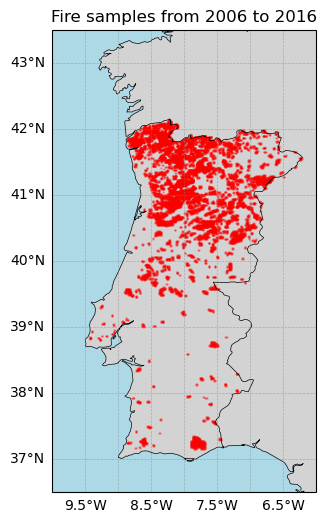

In [13]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Step 1: Convert your data into a GeoDataFrame
fire = c['burned_areas'].to_numpy()
latitudes = c['y'].to_numpy()
longitudes = c['x'].to_numpy()

geometry = [Point(xy) for xy in zip(longitudes, latitudes)]
gdf_fire = gpd.GeoDataFrame({'fire': fire}, geometry=geometry, crs="EPSG:3763")

# Step 2: Set up the Cartopy map
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Step 3: Set extent (optional — zoom to Portugal)
ax.set_extent([-10, -6, 36.5, 43.5], crs=ccrs.PlateCarree())

# Step 4: Add background features
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=0.5)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgrey')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Step 5: Plot fire points
gdf_fire.plot(
    ax=ax,
    column='fire',
    color='red',
    markersize=0.5,
    alpha=0.3,
    legend=True,
    transform=ccrs.PlateCarree()
)


# Step 6: Add gridlines and labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Step 7: Finalize plot
ax.set_title("Fire samples from 2006 to 2016")
plt.show()

In [8]:
print(a['burned_areas'].sum())
print(b['burned_areas'].sum())

19226
13319


In [12]:
print(c['burned_areas'].sum())
print(d['burned_areas'].sum())

19065.0
15499.0
